# **4. Evaluation Metrics for Classification**

In the previous session we trained a model for predicting churn. How do we know if it's good?

### **4.1 Evaluation metrics: session overview**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [37]:
file_path = r"C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [38]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

In [39]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [40]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [41]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [42]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

### **4.2 Accuracy and dummy model**

- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [44]:
len(y_val)

1409

In [45]:
(y_val == churn_decision).sum().item()

1131

In [46]:
1131/1409

0.8026969481902059

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

This part evaluates the model's accuracy across different thresholds ranging from 0 to 1 in equal steps of 0.05. It first creates a list of thresholds using np.linspace(0, 1, 21) and initializes an empty list to store accuracy scores. For each threshold, the predicted probabilities (y_pred) are compared with the current threshold, converting them into binary predictions (0 or 1). The accuracy is then calculated by comparing these predictions with the actual values (y_val). The threshold and corresponding accuracy score are printed, and each score is stored in the scores list for further analysis.

In [49]:
thresholds = np.linspace(0, 1, 21) # Generate 21 thresholds between 0 and 1 (inclusive)

scores = [] # Initialize an empty list to store the accuracy scores

for t in thresholds: # Loop through each threshold
    churn_decision= (y_pred >= t)
    score = (y_val == churn_decision).mean()    # Compare predicted probabilities with the current threshold and calculate the accuracy
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.595
0.15 0.665
0.20 0.707
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.784
0.45 0.792
0.50 0.803
0.55 0.800
0.60 0.796
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


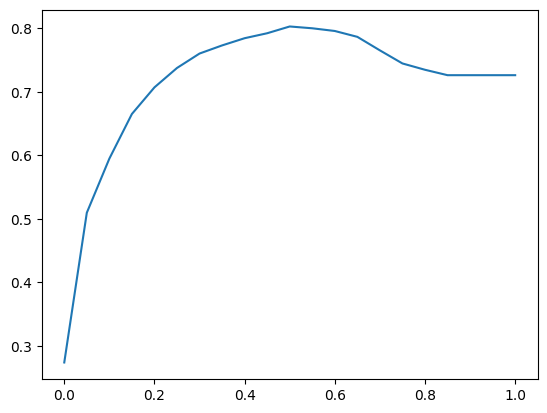

In [50]:
plt.plot(thresholds, scores) # This pattern is typical for many classification models, where an optimal balance is found near a threshold of 0.5.

In [51]:
 from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [53]:
accuracy_score(y_val, y_pred >=0.5) # this is a funktion in sklean

0.8026969481902059

In [54]:
thresholds = np.linspace(0, 1, 21) # Generate 21 thresholds between 0 and 1 (inclusive)

scores = [] # Initialize an empty list to store the accuracy scores

for t in thresholds: # Loop through each threshold
    accuracy_score(y_val, y_pred >=t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.726
0.05 0.726
0.10 0.726
0.15 0.726
0.20 0.726
0.25 0.726
0.30 0.726
0.35 0.726
0.40 0.726
0.45 0.726
0.50 0.726
0.55 0.726
0.60 0.726
0.65 0.726
0.70 0.726
0.75 0.726
0.80 0.726
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [55]:
from collections import Counter

In [56]:
Counter(y_pred>=1.0) # model says no one is going to churn , we dont need to send promotional emails

Counter({np.False_: 1409})

In [57]:
y_val.mean()*100 # churning rate

np.float64(27.395315826827538)

In [58]:
(1-y_val).mean()*100

np.float64(72.60468417317246)

### **4.3 Confusion table**

- Different types of errors and correct decisions
- Arranging them in a table


In [98]:
actual_positive = (y_val==1) 
actual_negative = (y_val==0) 

- actual_positive: Identifies customers who actually churn (y_val == 1).
- actual_negative: Identifies customers who do not churn (y_val == 0).

In [99]:
t = 0.5 # Set a threshold (t) to classify predictions as positive or negative
predict_positive = (y_pred >= t) # predict positive when its above the treshhold 
predict_negative = (y_pred < t) # predict negativr when its below the treshhold 

t = 0.5: A decision threshold to classify predictions.
- predict_positive: Marks cases where the model predicts churn (predicted value >= 0.5).
- predict_negative: Marks cases where the model predicts no churn (predicted value < 0.5).

In [95]:
actual_positive[:5] # True, when customers are going to churn

array([False, False, False,  True, False])

In [96]:
predict_positive[:5]# predict positive when the customer is going to churn 

array([False, False, False,  True, False])

In [97]:
(actual_positive  & predict_positive)[:5] # its is true if and only if both above are true

array([False, False, False,  True, False])

In [102]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

**tp,tn:**
- True Positives (TP): Cases where the customer actually churned and the model correctly predicted churn.
- True Negatives (TN): Cases where the customer did not churn, and the model correctly predicted no churn.

In [103]:
tp, tn

(np.int64(211), np.int64(920))

In [107]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


**fp, fn:**
- False Positives (FP): The model incorrectly predicts churn, but the customer did not churn.
- False Negatives (FN): The model predicts no churn, but the customer actually churns.

In [108]:
fp, fn

(np.int64(103), np.int64(175))

In [114]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[920, 103],
       [175, 211]])

**Confusion Matrix:** This is a table that summarizes the performance of the classification model.

- Row 1: [TP, FP] — True positives and false positives.
- Row 2: [FN, TN] — False negatives and true negatives.

The result is an array that represents the matrix.

### **Insights:**
**<span style="color:green">True Negative (920):**</span> These are the customers who did not churn and were correctly predicted as not churning.

**<span style="color:green">False Positives (103):**</span> These customers did not churn, but we predicted they would. So, we sent them promotions unnecessarily, resulting in wasted marketing spend.

**<span style="color:green">False Negatives (175):**</span> These customers did churn, but weincorrectly predicted that they wouldn’t. We didn't send them any promotions, and they left, leading to a loss of revenue.

**<span style="color:green">True Negatives (211):**</span> These customers did not churn, and we correctly predicted they wouldn’t. No promotion was needed, and no marketing spend was wasted here.

In [115]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

**<span style="color:green">Accuracy: 80% = 65% + 15%**</span>